In [9]:
from matplotlib import pyplot as plt
import numpy as np
import json
import os
from argoverse.map_representation.map_api import ArgoverseMap

am = ArgoverseMap()



In [60]:
root_dir = "ResultsJson/"
file_list = os.listdir(root_dir)


index = 0
json_dict = {}
with open(root_dir + file_list[index]) as json_data:
    json_dict = json.load(json_data)

preds = np.array(json_dict['preds'])
waypoint_preds = np.array(json_dict['waypoint_preds'])
agent_labels = np.array(json_dict['agent_labels'])


In [61]:
import math
from shapely.geometry import LineString

def draw(AGENT, AV, json_dict):
    def denormalization(arr, angle, translation_x, translation_y):
#         arr[...,0] -= np.mean(arr[...,0])
#         arr[...,1] -= np.mean(arr[...,1])
#         json_dict['preds'] = [[np.array(json_dict['preds'])[0][i] - min(json_dict['preds'][0][i][:2]) for i in range(len(json_dict['preds'][0]))]]    # calculate x's mean and y's mean in predict

        theta = (angle)/180*math.pi
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c, -s), (s, c)))

        #rotate
        arr = np.array([R.dot(arr[...,:2][i].reshape((2,1))).flatten() for i in range(len(arr[...,:2]))])

        #translate
        arr[...,0] += translation_x
        arr[...,1] += translation_y
        arr[...,0] += (AGENT[19,0] - AGENT[0,0])
        arr[...,1] += (AGENT[19,1] - AGENT[0,1])
        return arr
    
    plt.figure(figsize=(8, 8))
    x_mean = np.array(json_dict['preds'])[0,:,0,0].mean()
    y_mean = np.array(json_dict['preds'])[0,:,0,1].mean()

    # Recalculate angle
    angle_ans = -json_dict['rotation']
    print("=" * 100)
    print("angel_ans : ", angle_ans)
    print(-json_dict['rotation'])

    print(np.array(json_dict['preds'][0])[:,0,-1] * 180 / math.pi)
    xmin = [9999]
    xmax = [-9999]
    ymin = [9999]
    ymax = [-9999]
    json_dict['preds'] = [[np.array(json_dict['preds'])[0][i] - min(json_dict['preds'][0][i][:2]) for i in range(len(json_dict['preds'][0]))]]    # calculate x's mean and y's mean in predict

    for p in json_dict['preds'][0]:
        p = denormalization(np.array(p), angle_ans, -json_dict['translation'][0], -json_dict['translation'][1])
        plt.plot(p[...,0], p[...,1])
        plt.scatter(p[...,0][0], p[...,1][0])
        plt.scatter(p[...,0][-1], p[...,1][-1], linewidth=2)
        xmin = min(np.append(xmin, p[...,0]))
        xmax = max(np.append(xmax, p[...,0]))
        ymin = min(np.append(ymin, p[...,1]))
        ymax = max(np.append(ymax, p[...,1]))

    plt.plot(AGENT[...,0],AGENT[...,1], color='blue')
    plt.scatter(AGENT[...,0][-1],AGENT[...,1][-1], color='blue',linewidth=8)
    plt.scatter(AGENT[...,0][19],AGENT[...,1][19], color='blue')
    plt.plot(AV[...,0],AV[...,1], color='black')
    plt.scatter(AV[...,0][-1],AV[...,1][-1], color='black')

    xmin = min(np.append(np.append(AGENT[...,0], AV[...,0]),xmin))
    xmax = max(np.append(np.append(AGENT[...,0], AV[...,0]),xmax))
    ymin = min(np.append(np.append(AGENT[...,1], AV[...,1]),ymin))
    ymax = max(np.append(np.append(AGENT[...,1], AV[...,1]),ymax))
    
    local_lane_polygons = am.find_local_lane_polygons([xmin-50, xmax+50, ymin-50, ymax+50], city_name)
    print(xmin, xmax, ymin, ymax)
    for l in local_lane_polygons:
        plt.plot(l[...,0],l[...,1], linewidth='0.5', color='gray')
    plt.show()


    # for p in json_dict['preds'][0]:
    #     x = np.array(p)[...,0]
    #     y = np.array(p)[...,1]
    #     plt.plot(x,y)
    # plt.show()

24
angel_ans :  158.66415405273438
158.66415405273438
[ -0.         -54.24399977  -0.          -0.          -0.
 -23.815799  ]
1092.2098520410227 1156.5262003266278 45.10707225875775 70.56447583643002


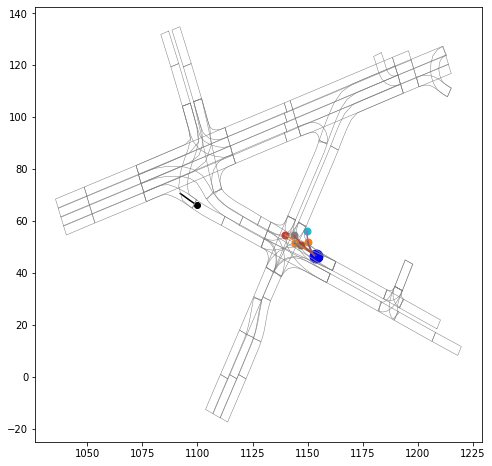

24
angel_ans :  -69.14234161376953
-69.14234161376953
[ -0.         -44.27878792  -0.          -0.          -0.
 -24.5662797 ]
1488.524642096938 1511.293611845946 173.1429927222026 243.9208284077832


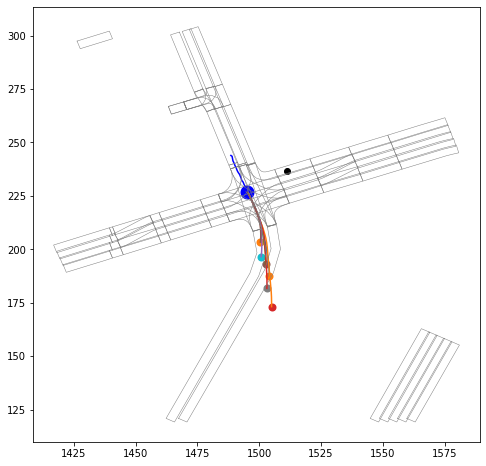

24
angel_ans :  20.878658294677734
20.878658294677734
[-19.22520325 -53.92806937  -0.          -0.          -0.
 -27.10403819]
920.3789421398143 940.0109473532054 13.898541576197054 37.7977067545582


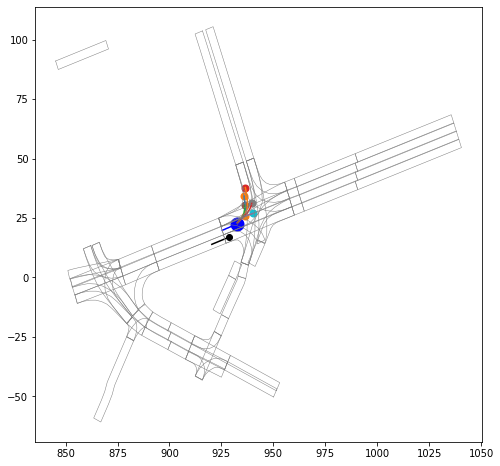

24
angel_ans :  52.755348205566406
52.755348205566406
[ -4.03518355 -49.20725435  -0.          -0.          -0.
 -18.93896539]
1630.6769156503515 1648.2037011572095 274.71568007078446 314.89806449759124


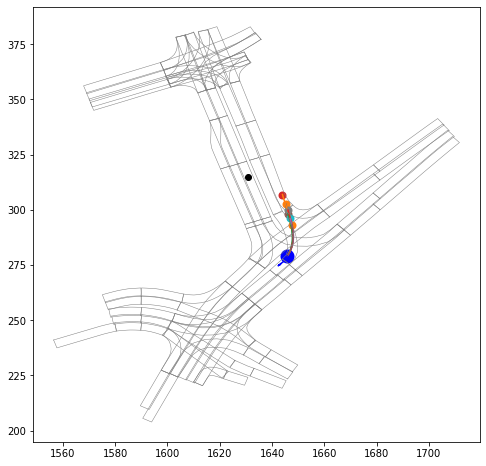

24
angel_ans :  47.33133316040039
47.33133316040039
[ -6.97755989 -45.28672235  -0.          -0.          -0.
 -17.40534716]
97.71626810455422 111.3948426444686 3958.720973604173 3996.155226078667


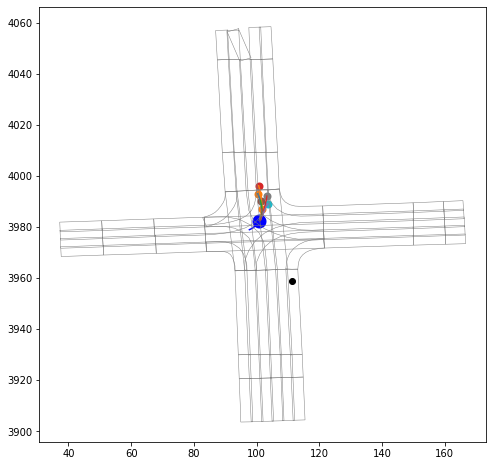

24
angel_ans :  -142.57861328125
-142.57861328125
[ -0.         -41.81164163  -0.          -0.          -0.
 -31.60772491]
1615.867219287156 1629.2665904054147 345.84077667927016 374.09805130634027


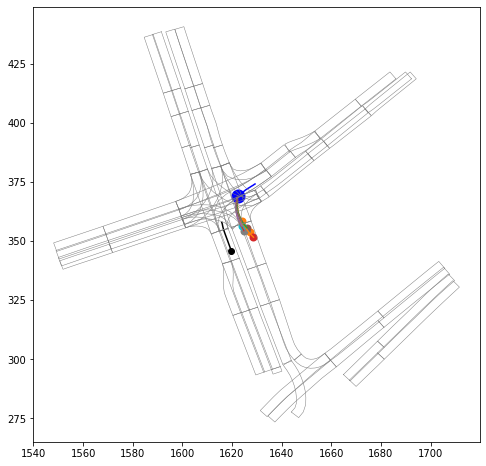

24
angel_ans :  145.2182159423828
145.2182159423828
[ -0.         -48.1247684   -0.          -0.          -0.
 -27.53162682]
-299.34399468996327 -268.5973321651547 3232.1677126720288 3298.759728496693


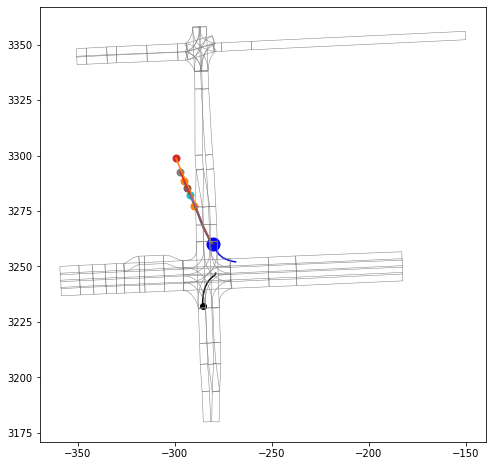

24
angel_ans :  -97.23062896728516
-97.23062896728516
[ -0.         -37.5129562   -0.          -0.          -0.
 -30.00982606]
-274.1095408293195 -267.9883787301914 2866.9701518493966 2897.1070556848786


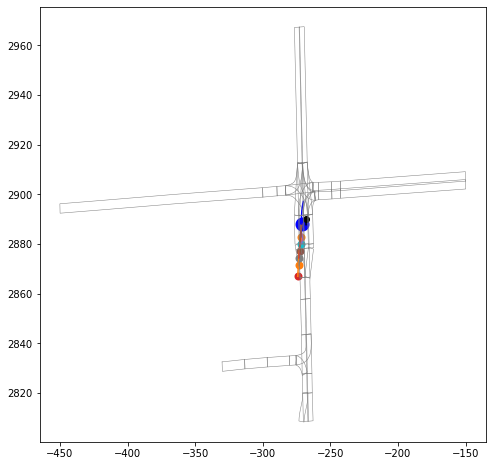

24
angel_ans :  -140.33119201660156
-140.33119201660156
[ -0.         -57.45074284  -0.          -0.          -0.
 -37.35493295]
1622.5267921191314 1658.9882031039792 273.11211121504283 306.93211489716134


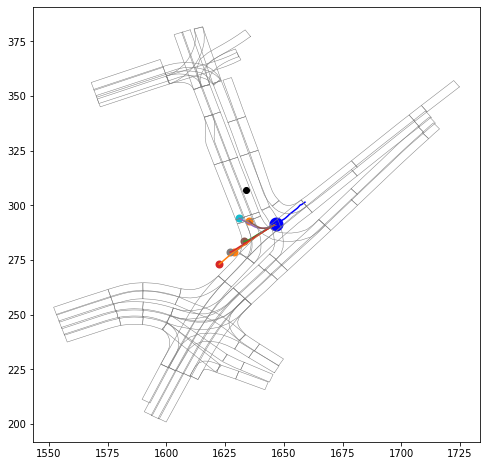

24
angel_ans :  -115.30026245117188
-115.30026245117188
[ -0.         -49.80243703  -0.          -0.          -0.
 -20.08172775]
1103.5687291359086 1127.0267491972247 -20.158962884707208 15.481117686348615


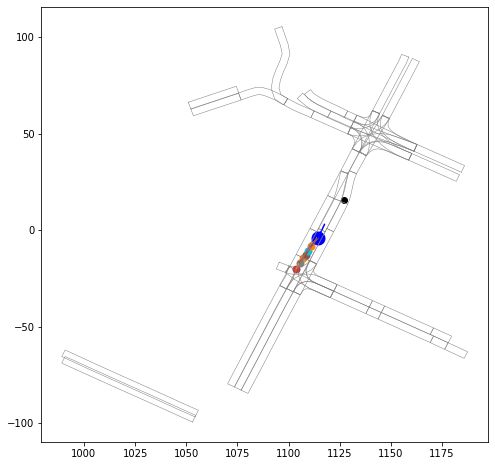

In [64]:
import csv

for i in range(10,20):

    root_dir = "ResultsJson/"
    file_list = sorted(os.listdir(root_dir), key=lambda a : str(a.split('.')[0]))
    index = i
    print(len(file_list))

    json_dict = {}

    with open(root_dir + file_list[index], 'r') as json_data:
        json_dict = json.load(json_data)


    AV = []
    AGENT = []
    city_name = ""

    with open("../../WIMP/data/argoverse_raw/test/" + json_dict['csv_file']) as csvfile: #val: 33, Test:25
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == 'AGENT':
                AGENT.append([float(row[3]), float(row[4])])

            elif row[2] == "AV":
                AV.append([float(row[3]), float(row[4])])

            city_name = row[-1]
    AV = np.array(AV)
    AGENT = np.array(AGENT)

    draw(AGENT, AV, json_dict)